# Learning and Decision Making

## Laboratory 5: Supervised learning

In the end of the lab, you should submit all code/answers written in the tasks marked as "Activity n. XXX", together with the corresponding outputs and any replies to specific questions posed to the e-mail <adi.tecnico@gmail.com>. Make sure that the subject is of the form [&lt;group n.&gt;] LAB &lt;lab n.&gt;.

### 1. The IRIS dataset

The Iris flower data set is a data set describing the morphologic variation of Iris flowers of three related species. Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".

The data set consists of 50 samples from each of three species of Iris (_Iris setosa_, _Iris virginica_ and _Iris versicolor_). Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres.

In your work, you will use only two of the four features and consider only two of the three species of Iris.

---

We start by loading the dataset and plotting the two classes of points that we wish to discriminate.

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

<IPython.core.display.Javascript object>


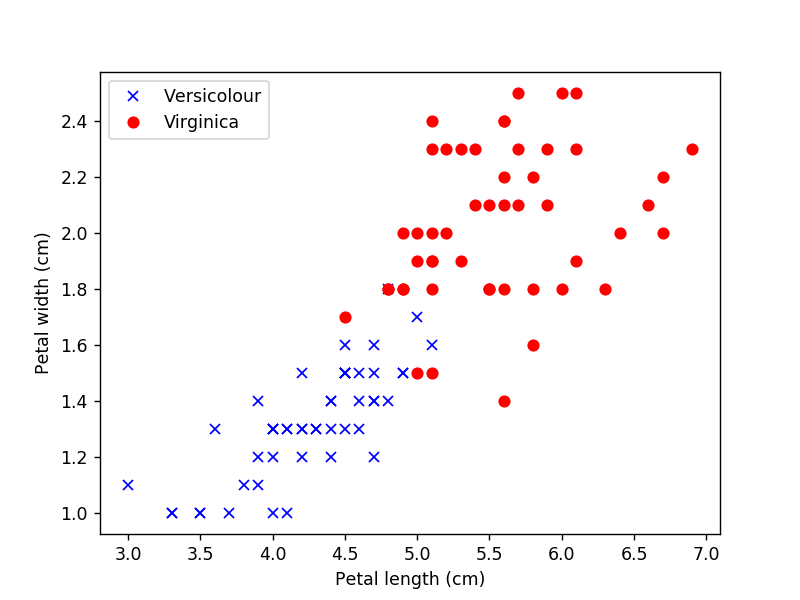

In [10]:
%matplotlib notebook
import matplotlib.pyplot as plt
from sklearn import datasets

# Load dataset
iris = datasets.load_iris()
print(iris.DESCR)

X = iris.data[50:,2:]
a = iris.target[50:]
a = list(map(lambda a:a-1, a))

# Plot data
plt.plot(X[:50, 0], X[:50, 1], 'bx', label='Versicolour')
plt.plot(X[50:, 0], X[50:, 1], 'ro', label='Virginica')
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.legend(loc='best')
plt.show()

---

#### Activity 1.        

Train a logistic regression classifier in Python using Newton-Raphson's method. The method is described by the update:

$$\mathbf{w}^{(k+1)}\leftarrow\mathbf{w}^{(k)}-\mathbf{H}^{-1}\mathbf{g},$$

where $\mathbf{H}$ and $\mathbf{g}$ are the _Hessian matrix_ and _gradient vector_ that you computed in your homework. Therefore, to train the classifier you should write a cycle that repeatedly updates the parameter vector according to the rule above until the difference between two iterations is sufficiently small (e.g., smaller than $10^{-5}$).

Print the resulting parameters and plot the decision boundary over the data points. Make sure that:

1. You augment your data pointa with an extra coordinate that is always 1
2. The output vector takes only values 0 and 1
3. You initialize your parameters to zero.

**Note:** Don't forget to import `numpy`.

---

The resulting weights are 
[[  5.75453232]
 [ 10.44669989]
 [-45.27234377]]


<IPython.core.display.Javascript object>


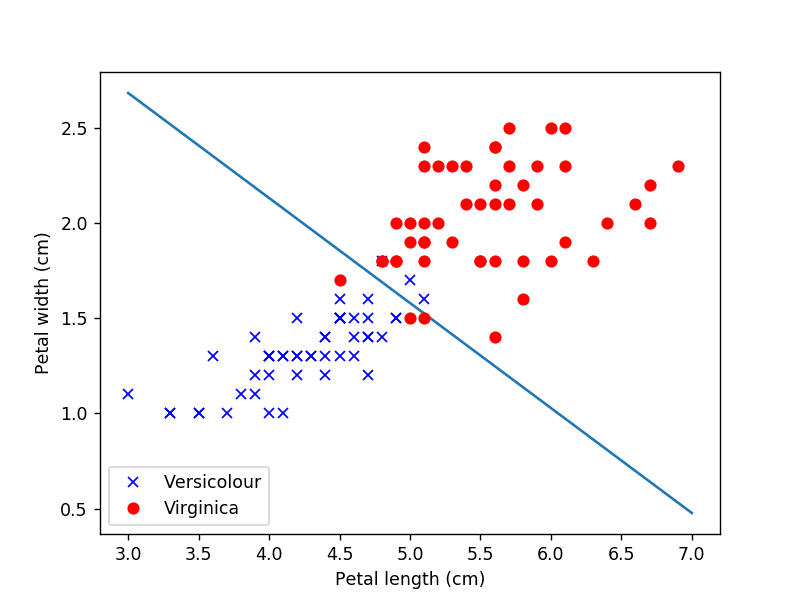

In [11]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

def augment_x(x):
    return np.append(x, np.array([1]))[:, np.newaxis] # Make it a column vector!

def pi(x, w):
    return 1/(1 + np.exp(-1 * (np.dot(w.T, x)))[0][0]) # Extract the value from the resulting vector

def gradient(w, N):
    soma = 0
    for i in range(N):
        x = augment_x(X[i])
        act = a[i]
        soma = np.add(soma, x * (act - pi(x, w)))
    return soma

def hessian(w, N):
    soma = 0
    for i in range(N):
        x = augment_x(X[i])
        soma = np.add(soma, np.dot(x, x.T) * pi(x,w) * (1 - pi(x,w)))
    return -1 * soma

# Initializing our parameters
N = len(X)
w_current = np.array([[0],[0],[0]])
w_next = np.subtract(w_current, np.dot(inv(hessian(w_current, N)), gradient(w_current, N)))

# The update itself
while not np.linalg.norm(w_next - w_current) < 10**-5:
    w_current = w_next
    w_next = np.subtract(w_current, np.dot(inv(hessian(w_current, N)), gradient(w_current, N)))

w = w_current
print("The resulting weights are ")
print(w)

# Plot data

# On the boundary, w*x + b = 0 <=> w1*x1 + w2*x2 + b = 0 <=> x2 = (-b - w1*x1)/w2
plt.figure(1)

x1 = np.linspace(3.0,7.0,100) # 100 linearly spaced numbers
x2 = (-w[2] - w[0]*x1)/w[1]
plt.plot(x1,x2)

plt.plot(X[:50, 0], X[:50, 1], 'bx', label='Versicolour')
plt.plot(X[50:, 0], X[50:, 1], 'ro', label='Virginica')
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.legend(loc='best')
plt.show()

---

#### Activity 2.        

Compare your classifier from Activity 1 with the logistic regression classifier implemented `sci-kit learn`. The code block below already loads and constructs a logistic regression model. 

To compare you must first fit the model to the data from Activity 1 (use the method `fit`). Next, you should build a fine grid of points $(x, y)$ in feature space (try using the `numpy` function `meshgrid`) and compute the corresponding class using the classifier (use the method `predict`). You can then use the function `plt.pcolormesh` to plot the resulting regions of decision.

---

<IPython.core.display.Javascript object>


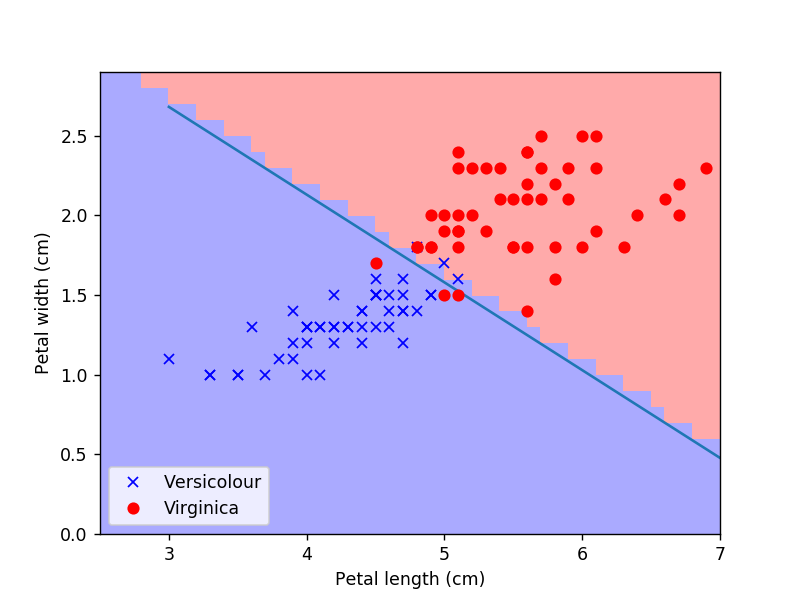

In [12]:
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap

model = LogisticRegression(solver='newton-cg', C=1e40)

# Fitting with the provided database
model.fit(X, a)

x1 = np.arange(2.5, 7.1, 0.1)
x2 = np.arange(0.0, 3, 0.1)

xx, yy = np.meshgrid(x1, x2)

labels = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot

plt.figure(2)
cmap_light = ListedColormap(['#AAAAFF', '#FFAAAA'])
plt.pcolormesh(x1, x2, labels, cmap=cmap_light)

# Draw the data points and the decision boundary once again to compare

x1 = np.linspace(3.0,7.0,100) # 100 linearly spaced numbers
x2 = (-w[2] - w[0]*x1)/w[1]
plt.plot(x1,x2)

plt.plot(X[:50, 0], X[:50, 1], 'bx', label='Versicolour')
plt.plot(X[50:, 0], X[50:, 1], 'ro', label='Virginica')
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.legend(loc='best')
plt.show()

### 2. SPAM filtering

You will now implement a spam filter, in which you will compare the results of different classifiers seen in class. In order to do so, you will first need to prepare the data for learning.

The following block of code illustrates how you can use the `os` module to access a list of files in a given folder. In particular, if you uncompress the file `data.zip` your working folder, the instruction `os.listdir('data')` will return a list with the contents of folder `data`.

In [13]:
import os

print(os.listdir('data'))

['.DS_Store', 'nonspam-test', 'nonspam-train', 'spam-test', 'spam-train']


Uncompress the data file `data.zip` to your current folder. You will find a total of four folders, named `spam-train`, `nonspam-train`, `spam-test` and `nonsmap-test`. Each folder contains a number of text files which have been pre-processed to remove stop-words, punctuation signs, and other non-informative elements. 

---

#### Activity 3.        

You will now select the 3,000 most frequent words appearing in the training data. You will use the number of occurrences of these words in each e-mail as the features that describe that e-mail. The code provided already goes over all the files in the folders `*-train` and builds a dictionary (actually, a `Counter`) containing all words appearing and how often they appear. 

Use the information in the (`Counter`) dictionary to select the 3,000 most frequent words. Before compiling the list of most common words, make sure to remove _non-words_---for which you can use the `isalpha` method of the `str` class---and _words of length 1_. To build the list of most frequent words, you may find useful the method `most_common` of the Counter class. Make sure you end up with a _sorted list_ containing the 3,000 most frequent words. 

---

In [14]:
from collections import Counter

words = []

files = []
for training_dir in ['data/spam-train', 'data/nonspam-train']:
    files += [os.path.join(training_dir, f) for f in os.listdir(training_dir)]

for f in files:
    fin = open(f, 'r')
    words += str(fin.read()).split()        
    fin.close()

d = Counter(words)

# Removing the 1 length words and non-words
for word in list(d):
    if len(word) == 1 or not str.isalpha(word):
        del d[word]

frequent_word_pairs = d.most_common(3000)

frequent_words =[pair[0] for pair in frequent_word_pairs]
frequent_words.sort()

#print(frequent_words)

Each of the files in the folder `spam-train` corresponds to a datapoint $(\mathbf{x}_n,a_n)$, where $\mathbf{x}_n$ is a vector containing the number of times that each of the most frequent words (computed in Activity 3) appears in that file, and $a_n$ is $0$. Conversely, each of the files in the folder `nonspam-train` corresponds to a datapoint $(\mathbf{x}_n,a_n)$, where $\mathbf{x}_n$ is again a vector containing the number of times that each of the most frequent words appears in that file, and $a_n$ is $1$. 

---

#### Activity 4.        

Go over the files in the aforementioned folders and create the a matrix `X` where each row $i$ is the datapoint corresponding to file $i$, and each column $j$ contains the number of times that the word $j$ appears in each of the files. Create the corresponding vector `a` of labels, where the component $i$ is 0 or 1 depending on whether file $i$ is spam or not.

** Note: ** You may want to create a function that receives the name of a folder and a list of words as arguments and returns the matrix of datapoints corresponding to the files in that folder, where each datapoint is described as a vector of features and each feature corresponds to the number of occurrences of the words in the list provided.

** Note 2: ** Extracting the features corresponding to the files may take a bit, so don't despair.

---

In [15]:
def extract_from_file(folder_name, file, word_list):
    words = []
    row = []
    fin = open(os.path.join(folder_name, file), 'r')
    words += str(fin.read()).split()        
    fin.close()
    d = Counter(words)
    for word in word_list:
        try:
            row += [d[word]]
        except:
            row += [0]
    return row

def extract_from_folder(folder_name, word_list):
    j = len(word_list) #3000
    X = np.empty((0,j), int)
    files = []
    files += [f for f in os.listdir(folder_name)]
    for f in files:
        X = np.append(X, np.array([extract_from_file(folder_name, f, word_list)]), axis=0)
    return X
   
X = np.append(extract_from_folder('data/nonspam-train', frequent_words), extract_from_folder('data/spam-train', frequent_words), axis=0)
a = np.append(np.ones(len(os.listdir('data/nonspam-train'))), np.zeros(len(os.listdir('data/spam-train'))))

#print(X.shape)
#print(a.shape)

Now that you have compiled your training set, you will train three different classifiers with the same dataset: a discriminant function (SVM), a discriminative model (LR) and a generative model (NB), and compare the performance of all three in terms of training time and performance on the test set. In order to do that, you must import the three classifiers and train them, much like you did with the LR classifier in Activity 2. 

The three classifiers have already been constructed for you.

---

#### Activity 5.

Train the three classifiers with the data that you collected in Activity 4. Report the time that each classifier took to train.

---

In [16]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
import time

# SVM model
svm_model = LinearSVC()
start_time = time.time()

svm_model.fit(X,a)

print("SVM Model took " + str(time.time()-start_time)+ " seconds to train")

# Logistic regression model
lr_model = LogisticRegression()
start_time = time.time()

lr_model.fit(X,a)

print("LR Model took " + str(time.time()-start_time)+ " seconds to train")


# Naive Bayes model
nb_model = MultinomialNB()
start_time = time.time()

nb_model.fit(X,a)

print("NB Model took " + str(time.time()-start_time)+ " seconds to train")


SVM Model took 0.024001598358154297 seconds to train
LR Model took 0.04001140594482422 seconds to train
NB Model took 0.012048482894897461 seconds to train


Finally, you will test the performance of the three classifiers in the test data. To that purpose, you must read the data in the `*-test` folders into a matrix of test points and the corresponding labels, and compare your predictions in this data with the actual labels. 

---

#### Activity 6.

For the messages in the folders `*-test` compute the predictions of your classifiers. Then, use the function `confusion_matrix` (which has been imported for you) to analyze the performance of your method. Report the accuracy of each classifier (i.e., the percentage of correct answers) and comment on the advantages and disadvantages of the three methods for this task.

---

In [17]:
from sklearn.metrics import confusion_matrix

X_test = np.append(extract_from_folder('data/nonspam-test', frequent_words), extract_from_folder('data/spam-test', frequent_words), axis=0)
a_test = np.append(np.ones(len(os.listdir('data/nonspam-test'))), np.zeros(len(os.listdir('data/spam-test'))))

# Prediciting our data according to the 3 models
svm_labels = []
lr_labels = []
nb_labels = []

for x in X_test:
    svm_labels += [int(svm_model.predict([x])[0])]
    lr_labels += [int(lr_model.predict([x])[0])]
    nb_labels += [int(nb_model.predict([x])[0])]

# 2x2 matrices since this is binary classification
c_matrix_svm = confusion_matrix(a_test, svm_labels)
c_matrix_lr = confusion_matrix(a_test, lr_labels)
c_matrix_nb = confusion_matrix(a_test, nb_labels)

print("The SVM Model got " + str((c_matrix_svm[0][0] + c_matrix_svm[1][1])/np.sum(c_matrix_svm) * 100) + "% correct answers")
print("The LR Model got " + str((c_matrix_lr[0][0] + c_matrix_lr[1][1])/np.sum(c_matrix_lr) * 100) + "% correct answers")
print("The NB Model got " + str((c_matrix_nb[0][0] + c_matrix_nb[1][1])/np.sum(c_matrix_nb) * 100) + "% correct answers")

The SVM Model got 98.8461538462% correct answers
The LR Model got 98.8461538462% correct answers
The NB Model got 98.0769230769% correct answers


The fastest was the Naive Bayes model, which theoretically makes sense since it's easier (a bunch of multiplications). It is not as accurate as the other two since it assumes the features are independent given the action

------------ SVM Model --------------

Advantages:

-> Can handle large feature space

-> Can handle non-linear feature interactions

-> High accuracy

Disadvantages:

-> Not very efficient with large number of observations

----------- LR Model -----------------

Advantages:

-> Easier to update when taking new data (Newton-Raphson)

-> The variables do not have to be linearly related

Disadvantages:

-> Independent observations needed

-> Vulnerable to overfitting

----------- NB Model -----------------

Advantages:

-> Easier to implement

-> Requires a small amount of training data to estimate the parameters

Disadvantages:

-> Naive Bayes assumes that the different features describing the state are independent given the class/action, which can lead
   to a potentially worse classifier with the loss of accuracy (hence being Naive)